In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [5]:
np.random.seed(42)
data = pd.DataFrame({
    'time_of_day': np.random.randint(0, 24, 100),
    'day_of_week': np.random.randint(0, 7, 100),
    'covid_cases': np.random.randint(0, 1000, 100),
    'economic_status': np.random.choice(['low', 'middle', 'high'], 100),
    'delivery_distance': np.random.uniform(0, 20, 100),
    'demand': np.random.uniform(50, 500, 100)
    })

In [7]:
# Encoding the categorical variable 'economic_status'

data['economic_status'] = data['economic_status'].map({'low': 0, 'middle': 1, 'high': 2})

In [9]:
# Features and target variable

X = data[['time_of_day', 'day_of_week', 'covid_cases', 'economic_status', 'delivery_distance']]
y = data['demand']

In [11]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [15]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

In [21]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

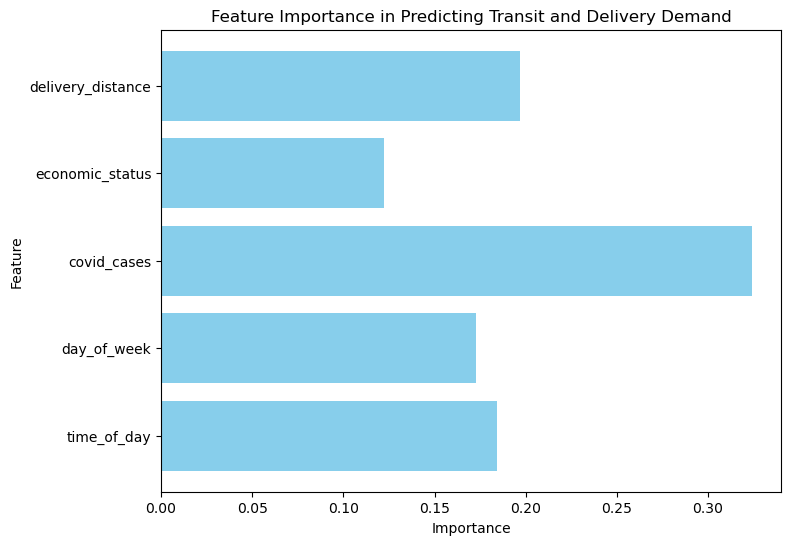

In [23]:
# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Transit and Delivery Demand')
plt.show()

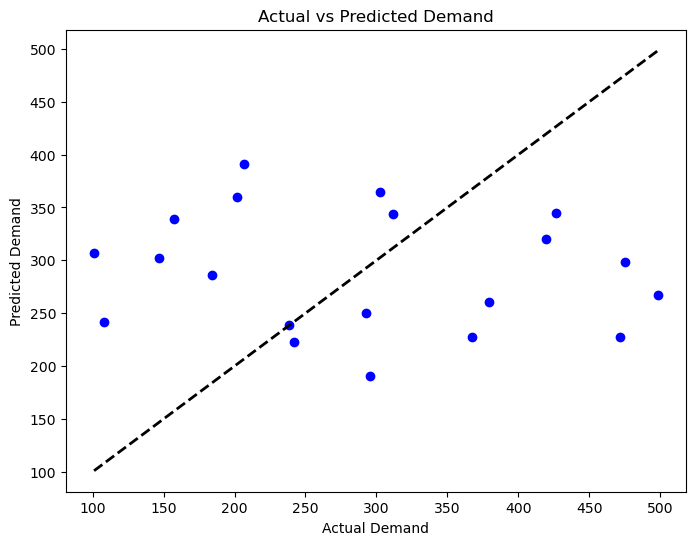

In [25]:
# Plotting Predicted vs Actual Demand
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.show()